In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()
%matplotlib inline

import math
#import cudf
#from cuml import ExponentialSmoothing as HW
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA


from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from kats.consts import TimeSeriesData
#from kats.detectors.detector import FFTDetector
from kats.detectors.seasonality import FFTDetector
from kats.tsfeatures.tsfeatures import TsFeatures

C:\Users\BALA ABDULJALIL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


AttributeError: module 'pandas' has no attribute 'Panel'

In [ ]:
# Set dimensions for printing
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('windturbine.csv', header=0 , parse_dates=[0])

In [3]:
df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116152 entries, 0 to 116151
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Unnamed: 0                    116152 non-null  datetime64[ns, UTC]
 1   ActivePower                   92688 non-null   float64            
 2   AmbientTemperatue             91917 non-null   float64            
 3   BearingShaftTemperature       60619 non-null   float64            
 4   Blade1PitchAngle              39934 non-null   float64            
 5   Blade2PitchAngle              39829 non-null   float64            
 6   Blade3PitchAngle              39829 non-null   float64            
 7   ControlBoxTemperature         60263 non-null   float64            
 8   GearboxBearingTemperature     60641 non-null   float64            
 9   GearboxOilTemperature         60538 non-null   float64            
 10  GeneratorRPM        

In [5]:
df.columns

Index(['Unnamed: 0', 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle',
       'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection',
       'WindSpeed'],
      dtype='object')

In [6]:
## Rename time index as 'timestamp'
df.columns = ['timestamp', 'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature',
       'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WTG', 'WindDirection', 'WindSpeed']

In [7]:
df.head()

,timestamp,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [8]:
#Remove timezone from timestamp
df['timestamp'] = df['timestamp'].dt.tz_localize(None)

In [9]:
df.head()

,timestamp,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [10]:
# Make timestamp index and index data to start from January 2018

df = df.set_index('timestamp')
dfCM = df.loc['2018-01-01 00:00:00':]

In [11]:
dfCM.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754
2018-01-01 00:40:00,-4.684632,22.936520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.745593,NaN,NaN,G01,345.000000,1.831420


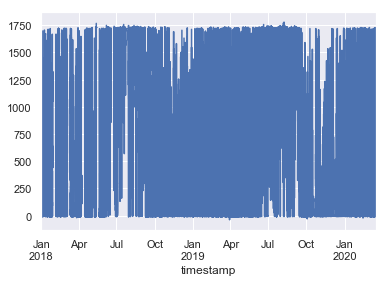

In [12]:
dfCM['ActivePower'].plot();

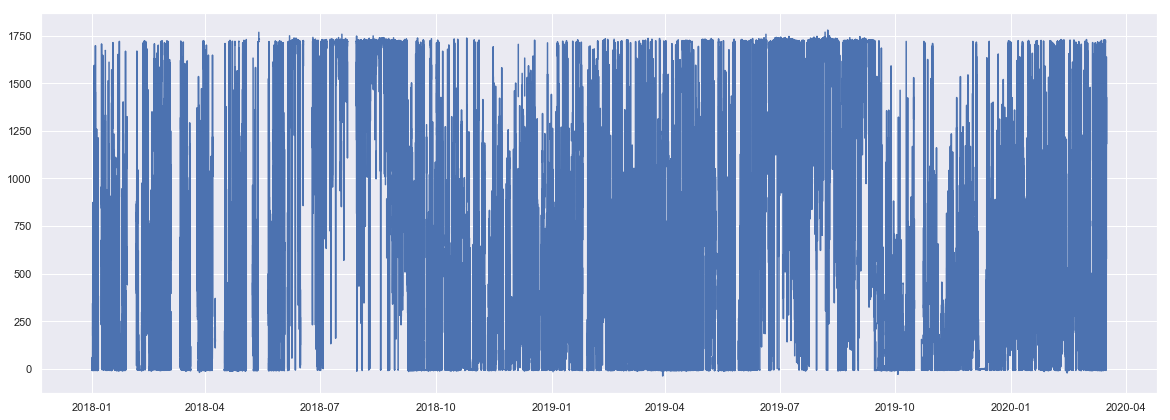

In [13]:
plt.figure(figsize=(20, 7))
plt.plot(dfCM['ActivePower']);

In [14]:
#Group by hour
dataH = dfCM[['ActivePower']]
dataH = dataH.groupby([pd.Grouper(freq='H')]).mean()

In [15]:
dataH

,ActivePower
timestamp,
2018-01-01 00:00:00,-5.091432
2018-01-01 01:00:00,-4.822549
2018-01-01 02:00:00,-4.668977
2018-01-01 03:00:00,-5.262396
2018-01-01 04:00:00,-5.600275
...,...
2020-03-16 10:00:00,370.703286
2020-03-16 11:00:00,530.666865
2020-03-16 12:00:00,883.187210


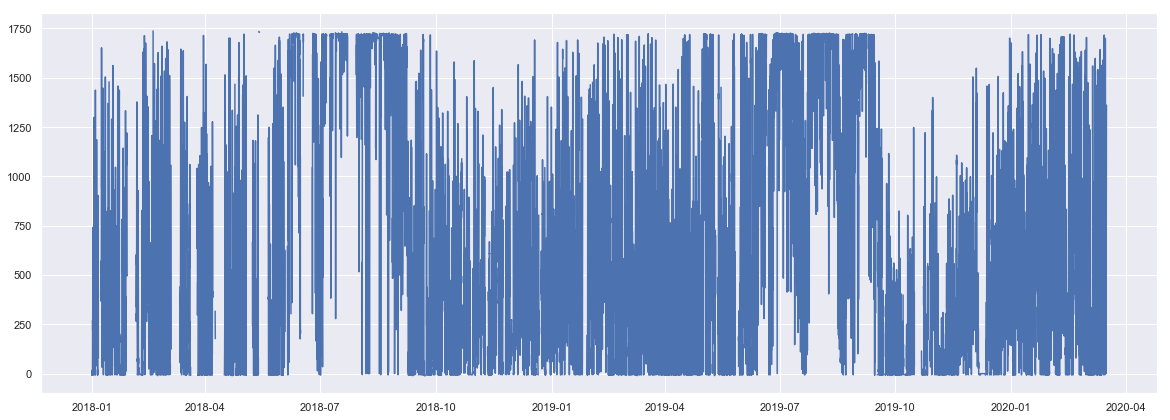

In [16]:
plt.figure(figsize=(20, 7))
plt.plot(dataH)
plt.show()

In [17]:
dataD = dfCM[['ActivePower']]
dataD = dataD.groupby([pd.Grouper(freq='D')]).mean()

In [18]:
dataD

,ActivePower
timestamp,
2018-01-01,190.815478
2018-01-02,339.470285
2018-01-03,317.517653
2018-01-04,361.856700
2018-01-05,236.783611
...,...
2020-03-12,353.652089
2020-03-13,580.446919
2020-03-14,677.050456


In [19]:
dataD.describe()

,ActivePower
count,737.000000
mean,620.371150
std,488.836712
min,-5.488917
25%,282.604120
50%,458.637504
75%,773.223933
max,1720.200880


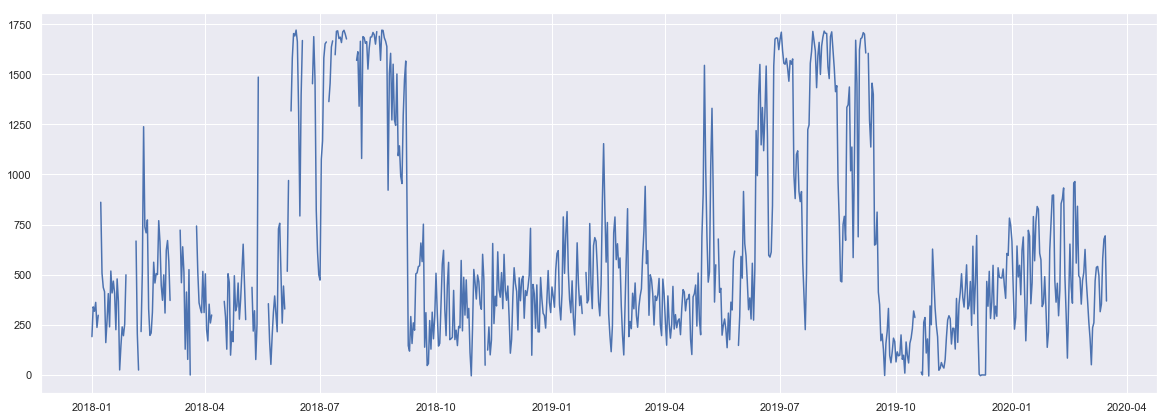

In [20]:
plt.figure(figsize=(20, 7))
plt.plot(dataD)
plt.show()

In [21]:
dataD.isnull().sum()

ActivePower    69
dtype: int64

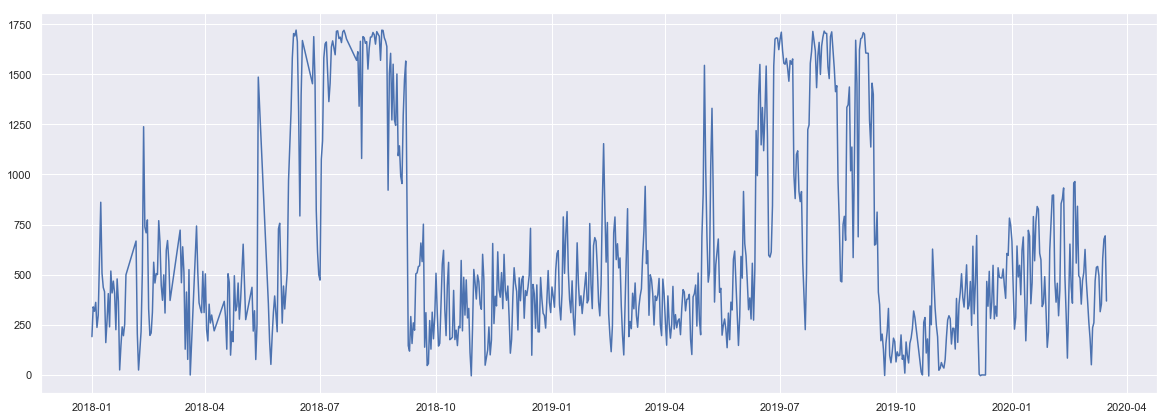

In [22]:
#Fill missing value with mv average
dd = dataD.interpolate()
dd = dd.fillna(method='bfill')
plt.figure(figsize=(20, 7))
plt.plot(dd)
plt.show()

In [25]:
def Holt_Winters_Model_nonseasonal(dataF):


    data = dataF

    y = data
    dataT = dataF
    
    ddf2 = dataF[(dataF.index >= dataF.index.min()) & (dataF.index < dataF.index.max())]
    dataT = ddf2
    dataT = dataT.groupby([pd.Grouper(freq='H')]).mean()
    avg = float(dataT[~np.isnan(dataT)].mean())
    dataT = dataT.fillna(avg)
    #yT = dataT
        
    dataset = dataT.values #numpy.ndarray
    dataset = np.reshape(dataset, (-1, 1))
    h = int(dataset.shape[0]*0.1)
    
    
    length = y.values
    length = np.reshape(length, (-1,1))
    length = int(length.shape[0])
    TrainLength = int(0.8*(length))
    TrainingData = y[:TrainLength]
    TestData = y[TrainLength:]
    TestLength = length - TrainLength

    #cudf_df_TrainingData = cudf.DataFrame.from_pandas(TrainingData)

    #t0 = time.time()

    x0 = 0 # start


    # Catch Value Error
    #try:
    fitData = HW(cudf_df_TrainingData, seasonal= "additive", output_type= 'input')     
    modelHW = fitData.fit() 
#t1 = time.time()
#print("Time (s): ", t1-t0)
    
        # Predict
    fc = modelHW.forecast(TestLength+h)
    fc = fc.to_numpy()
    variable = list(y.columns)
    prediction_dates = pd.date_range(TestData.index.min(), periods=TestLength+h, freq="H").tolist()
    predictions_df = pd.DataFrame(fc, prediction_dates, columns=[variable[0]])

    testPredicted = predictions_df[:-(h)]
    testExpected = TestData
    test_mae = mean_absolute_error(testExpected, testPredicted)
    test_mse = mean_squared_error(testExpected, testPredicted)
    test_rmse = np.sqrt(test_mse)







    #print('Train Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (train_mse, train_rmse, train_mae))
    print('Test Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (test_mse, test_rmse, test_mae))
    prediction =predictions_df[-(h):]


    variable = list(y.columns)
    # plot baseline and predictions
    plt.figure(figsize=(20, 7))
    ax1 = y[variable[0]].plot(color='blue', grid=True, label='real')
    ax2 = testPredicted[variable[0]].plot(color='red', grid=True, label='test_predicted')
    ax3 = prediction[variable[0]].plot(color='green', grid=True, label='forecast')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
    plt.show()

In [27]:
data = dd

y = data
#dataT = dd
    
ddf2 = dd[(dd.index >= dd.index.min()) & (dd.index < dd.index.max())]
dataT = ddf2
dataT = dataT.groupby([pd.Grouper(freq='H')]).mean()
avg = float(dataT[~np.isnan(dataT)].mean())
dataT = dataT.fillna(avg)
    #yT = dataT
        
dataset = dataT.values #numpy.ndarray
dataset = np.reshape(dataset, (-1, 1))
h = 7
    
    
length = y.values
length = np.reshape(length, (-1,1))
length = int(length.shape[0])
TrainLength = int(0.8*(length))
TrainingData = y[:TrainLength]
TestData = y[TrainLength:]
TestLength = length - TrainLength

In [28]:
TrainingData

,ActivePower
timestamp,
2018-01-01,190.815478
2018-01-02,339.470285
2018-01-03,317.517653
2018-01-04,361.856700
2018-01-05,236.783611
...,...
2019-10-02,115.017126
2019-10-03,95.117222
2019-10-04,98.424191


In [29]:
TestData

,ActivePower
timestamp,
2019-10-07,98.109896
2019-10-08,8.911063
2019-10-09,164.359821
2019-10-10,98.035237
2019-10-11,59.561946
...,...
2020-03-12,353.652089
2020-03-13,580.446919
2020-03-14,677.050456


In [30]:
dd

,ActivePower
timestamp,
2018-01-01,190.815478
2018-01-02,339.470285
2018-01-03,317.517653
2018-01-04,361.856700
2018-01-05,236.783611
...,...
2020-03-12,353.652089
2020-03-13,580.446919
2020-03-14,677.050456
